# Unblinding 1e0p

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
pi0scaling = {"val": 0, "suffix": "", "title": "No pi0 Scaling"}

In [3]:
from matplotlib import pyplot as plt

params = {
    'axes.labelsize': 'x-large',
    'axes.titlesize': 'x-large',
    'xtick.labelsize': 'x-large',
    'ytick.labelsize': 'x-large'
}
plt.rcParams.update(params)

from load_data_run123 import *
from unblinding_far_sideband import *

In [4]:
import sys
import localSettings as ls
main_path = ls.main_path
sys.path.append(main_path)

In [5]:
import scipy.stats
import warnings
warnings.filterwarnings('ignore')

In [6]:
which_sideband = ['fulldata'     ,'fulldata'] 

In [7]:
samples = load_data_run123(which_sideband=which_sideband[0],
                           return_plotter=False,
                           pi0scaling=pi0scaling["val"],
                           loadpi0variables=False,
                           loadtruthfilters=True,
                           loadshowervariables=True,
                           loadnumuntuples=False,
                           loadnumuvariables=False,
                           loadfakedata=0,
                           USEBDT=True,
                           loadsystematics=True,
                           loadrecoveryvars=False)

Loading uproot files
Loading Run3 dataframes
r3data has shape :  (12875, 154)
Loading Run1 dataframes
r1data has shape :  (8451, 154)
Loading Run2 dataframes
r2data has shape :  (13276, 154)
Concatenate dataframes
opendata dataset has shape :  (34602, 204)
Add derived variables
Add BDT scores


In [27]:
import plotter
import unblinding_far_sideband
import importlib
importlib.reload(plotter)
importlib.reload(unblinding_far_sideband)

<module 'unblinding_far_sideband' from '/Users/davidc-local/Neutrinos/NUE/PELEE/unblinding_far_sideband.py'>

In [28]:
plotter_runbyrun = {}
for run in [1, 2, 3, 123, 12]:
    this_weights, this_pot = get_weights(run,dataset=which_sideband[1])
    plotter_runbyrun[run] = plotter.Plotter(samples, this_weights, pot=this_pot)

In [29]:
DETSYS = {'mc':False,'nue':False,'ccpi0':False,'ncpi0':False,'dirt':False,\
          'ncnopi':False,'nccpi':False,'ncpi0':False,'ccpi0':False}

In [ ]:
#Test plot: Reco_E >0.65 GeV

from unblinding_far_sideband import *

sdb_key = 'None' 
pre_key = 'ZP'
sel_key = 'ZPBDT'
run = 123

sideband = sideband_categories[sdb_key]
preselection = preselection_categories[pre_key]
sel =  selection_categories[sel_key]

DETSYSPATH = ls.ntuple_path+'/detsys/{}_{}_{}/'.format(sideband['dir'], preselection['dir'], sel['dir'])

QUERY = ""
for query in [sideband['query'],preselection['query'],sel['query']]:
    if query is None: continue
    if QUERY: QUERY += ' and '
    QUERY += query
    if run in [1, 2, 3, 12]:
        QUERY += f' and run{run}==True'

QUERY += ' and (bnbdata==0 or reco_e>0.65)'

TITLE = ""
for text in [f'Run {run}',' - ',sideband['title'],' - ',preselection['title'],'\n',sel['title'],' - ',pi0scaling["title"]]:
    if text is None: continue
    TITLE += text

VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.15, 1.55),r"Reconstructed Energy [ GeV ]"

fig, ax1, ax2 = plotter_runbyrun[run].plot_variable(
    VARIABLE,   
    query=QUERY,
    kind="paper_category",
    draw_sys=True,
    detsysdict=DETSYS,
    DETSYSPATH=DETSYSPATH,
    COVMATRIX="",
    ratio=False,
    stacksort=3,
    title=XTIT,
    bins=BINS,
    range=RANGE,
    chisq=False,
)[0:3]

ax1.set_title(TITLE, loc='left')
ax1.set_ylim(0., ax1.get_ylim()[1]*1.4)

plt.tight_layout()
fig.show()
save_path = ls.plots_path
fig.savefig(ls.plots_path+VARIABLE+"_1.pdf") 

In [ ]:
#Test plot: n_showers_contained, all energies, loose selection

from unblinding_far_sideband import *

sdb_key = 'None' 
pre_key = 'ZP'
sel_key = 'ZPLOOSESEL'
run = 123

sideband = sideband_categories[sdb_key]
preselection = preselection_categories[pre_key]
sel =  selection_categories[sel_key]

DETSYSPATH = ls.ntuple_path+'/detsys/{}_{}_{}/'.format(sideband['dir'], preselection['dir'], sel['dir'])

QUERY = ""
for query in [sideband['query'],preselection['query'],sel['query']]:
    if query is None: continue
    if QUERY: QUERY += ' and '
    QUERY += query
    if run in [1, 2, 3, 12]:
        QUERY += f' and run{run}==True'
        
TITLE = ""
for text in [f'Run {run}',' - ',sideband['title'],' - ',preselection['title'],'\n',sel['title'],' - ',pi0scaling["title"]]:
    if text is None: continue
    TITLE += text

VARIABLE, BINS, RANGE, XTIT = 'n_showers_contained',10,(-0.5, 9.5),"n showers contained"

fig, ax1, ax2 = plotter_runbyrun[run].plot_variable(
    VARIABLE,   
    query=QUERY,
    kind="paper_category",
    draw_sys=True,
    detsysdict=DETSYS,
    DETSYSPATH=DETSYSPATH,
    COVMATRIX="",
    ratio=False,
    stacksort=3,
    title=XTIT,
    bins=BINS,
    range=RANGE,
    chisq=False,
)[0:3]

ax1.set_title(TITLE, loc='left')
ax1.set_ylim(0., ax1.get_ylim()[1]*1.4)

plt.tight_layout()
fig.show()
save_path = ls.plots_path
fig.savefig(ls.plots_path+VARIABLE+"_2.pdf") 

In [ ]:
#Test plot: n_showers_contained, all energies, BDT selection

from unblinding_far_sideband import *

sdb_key = 'None' 
pre_key = 'ZP'
sel_key = 'ZPBDT'
run = 123

sideband = sideband_categories[sdb_key]
preselection = preselection_categories[pre_key]
sel =  selection_categories[sel_key]

DETSYSPATH = ls.ntuple_path+'/detsys/{}_{}_{}/'.format(sideband['dir'], preselection['dir'], sel['dir'])

QUERY = ""
for query in [sideband['query'],preselection['query'],sel['query']]:
    if query is None: continue
    if QUERY: QUERY += ' and '
    QUERY += query
    if run in [1, 2, 3, 12]:
        QUERY += f' and run{run}==True'
        
TITLE = ""
for text in [f'Run {run}',' - ',sideband['title'],' - ',preselection['title'],'\n',sel['title'],' - ',pi0scaling["title"]]:
    if text is None: continue
    TITLE += text

VARIABLE, BINS, RANGE, XTIT = 'n_showers_contained',10,(-0.5, 9.5),"n showers contained"

fig, ax1, ax2 = plotter_runbyrun[run].plot_variable(
    VARIABLE,   
    query=QUERY,
    kind="paper_category",
    draw_sys=True,
    detsysdict=DETSYS,
    DETSYSPATH=DETSYSPATH,
    COVMATRIX="",
    ratio=False,
    stacksort=3,
    title=XTIT,
    bins=BINS,
    range=RANGE,
    chisq=False,
)[0:3]

ax1.set_title(TITLE, loc='left')
ax1.set_ylim(0., ax1.get_ylim()[1]*1.4)

plt.tight_layout()
fig.show()
save_path = ls.plots_path
fig.savefig(ls.plots_path+VARIABLE+"_3.pdf") 

# 1e0p Selection

In [35]:
from unblinding_far_sideband import *

sdb_key = 'None'
pre_key = 'ZP'
sel_key = 'ZPBDT'
run = 123

sideband = sideband_categories[sdb_key]
preselection = preselection_categories[pre_key]
sel =  selection_categories[sel_key]

DETSYS = {'mc':True,'nue':True,'ccpi0':True,'ncpi0':True,'dirt':True,\
          'ncnopi':True,'nccpi':True,'ncpi0':True,'ccpi0':True}

DETSYSPATH = ls.ntuple_path+'/detsys/{}_{}_{}/'.format(sideband['dir'], preselection['dir'], sel['dir'])

QUERY = ""
for query in [sideband['query'],preselection['query'],sel['query']]:
    if query is None: continue
    if QUERY: QUERY += ' and '
    QUERY += query
    if run in [1, 2, 3, 12]:
        QUERY += f' and run{run}==True'
        
SELQUERY = '{}_{}_{}_'.format(sideband['dir'], preselection['dir'], sel['dir'])
        
TITLE = ""
for text in [f'Run {run}',' - ',sideband['title'],' - ',preselection['title'],'\n',sel['title'],' - ',pi0scaling["title"]]:
    if text is None: continue
    TITLE += text

Reconstructed Neutrino Energy

In [ ]:
#VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.15, 1.55),r"Reconstructed Energy [ GeV ]"
#VARIABLE, BINS, RANGE, XTIT = 'reco_e',8,(0.15, 2.39),r"Reconstructed Energy [ GeV ]"
VARIABLE, BINS, RANGE, XTIT = 'reco_e',17,(0.01, 2.39),r"Reconstructed Energy [ GeV ]"

fig, ax1, ax2 = plotter_runbyrun[run].plot_variable(
    VARIABLE,   
    query=QUERY,
    kind="paper_category",
    draw_sys=True,
    detsysdict=DETSYS,
    DETSYSPATH=DETSYSPATH,
    COVMATRIX="",
    ratio=False,
    stacksort=3,
    title=XTIT,
    bins=BINS,
    range=RANGE,
    chisq=True,
)[0:3]

ax1.set_title(TITLE, loc='left')
ax1.set_ylim(0., ax1.get_ylim()[1]*1.4)

print ('prediction : ', plotter_runbyrun[run].prediction)
print ('errors     : ', np.sqrt(np.diagonal(plotter_runbyrun[run].cov)))

plt.tight_layout()
fig.show() 

save_path = ls.plots_path
#fig.savefig(ls.plots_path+VARIABLE+"_gof_2390MeV.pdf") 

Shower Angle

In [ ]:
VARIABLE, BINS, RANGE, XTIT = 'shr_theta',11,(0,3.14),r"Shower $\theta$ [rad]" 

fig, ax1, ax2 = plotter_runbyrun[run].plot_variable(
    VARIABLE,   
    query=QUERY,
    figtitle="MicroBooNE",
    #labeldecimals=0,
    predictedevents=False,
    kind="paper_category",
    draw_sys=True,
    detsysdict=DETSYS,
    DETSYSPATH=DETSYSPATH,
    COVMATRIX="",
    ratio=False,
    stacksort=3,
    title=XTIT,
    bins=BINS,
    range=RANGE,
    chisq=False,
)[0:3]

ax1.set_title(TITLE, loc='left')
ax1.set_ylim(0., ax1.get_ylim()[1]*1.4)

plt.tight_layout()
fig.show() 
save_path = ls.plots_path
fig.savefig(ls.plots_path+VARIABLE+".pdf") 

# PRD Plots

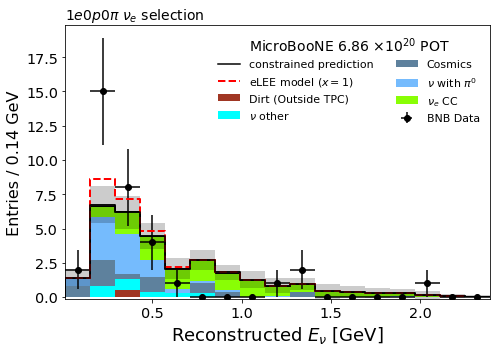

In [16]:
BINSIZE = 0.14
#BINSIZE = 280

if (BINSIZE == 0.14):
    # full-bin
    VARIABLE, BINS, RANGE, XTIT = 'reco_e',17,(0.01, 2.39),r"Reconstructed $E_{\nu}$ [GeV]"
else:
    # half-bin
    VARIABLE, BINS, RANGE, XTIT = 'reco_e_mev',8,(150, 2390),r"Reconstructed $E_{\nu}$ [MeV]"
    
SELQUERY = '{}_{}_{}_'.format(sideband['dir'], preselection['dir'], sel['dir'])


DETSYS = {'mc':False,'nue':False,'ccpi0':False,'ncpi0':False,'dirt':False,\
          'ncnopi':False,'nccpi':False,'ncpi0':False,'ccpi0':False}

fig, ax1, ax2 = plotter_runbyrun[run].plot_variable(
    VARIABLE,   
    query=QUERY,
    kind="paper_category",
    draw_sys=True,
    detsysdict=DETSYS,
    DETSYSPATH=DETSYSPATH,
    COVMATRIX="",
    predictedevents=False,
    figtitle="MicroBooNE",
    drawsystematics=False,
    labeldecimals=2,
    ratio=False,
    stacksort=3,
    title=XTIT,
    bins=BINS,
    range=RANGE,
    chisq=False,
)[0:3]

n_tot =  plotter_runbyrun[run].prediction
exp_err = np.sqrt(np.diagonal(plotter_runbyrun[run].cov))

n_constrained = n_tot

LEE = np.zeros(len(n_constrained))

if (BINSIZE == 0.14):
    n_constrained = np.array([1.40,6.74,6.19,4.43,2.08,2.70,1.81,1.26,0.82,\
                             0.97,0.42,0.38,0.27,0.30,0.15,0.07,0.07])
    exp_err = np.array([0.61,1.33,1.21,0.94,0.77,0.70,0.54,\
                      0.61,0.56,0.44,0.54,0.39,0.36,0.26,0.28,0.14,0.07])
    LEE = np.array([0.00,1.90,1.00,0.36,0.09,0.02,0.01,0.00,\
                   0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00])
    
'''
else:
    # half binning
    n_constrained[0] = 6.74+6.19
    n_constrained[1] = 4.43+2.08
    n_constrained[2] = 2.70+1.81
    n_constrained[3] = 1.26+0.82
    n_constrained[4] = 0.97+0.42
    LEE[0] += 1.90+1.00
    LEE[1] += 0.36+0.09
    LEE[2] += 0.02+0.01
    exp_err[0] = np.sqrt(1.33**2+1.21**2)
    exp_err[1] = np.sqrt(0.94**2+0.77**2)
    exp_err[2] = np.sqrt(0.70**2+0.54**2)
    exp_err[3] = np.sqrt(0.61**2+0.56**2)
    exp_err[4] = np.sqrt(0.44**2+0.54**2)
'''

n_lee = n_constrained + LEE
#exp_err = np.sqrt(np.diagonal(plotter_runbyrun[run].cov))

if (BINSIZE == 0.14):
    # full binning
    LEE_err = np.sqrt(exp_err**2 + np.array([0.00,0.67,0.29,0.11,0.03,0.01,0,0,0,0,0,0,0,0,0,0,0])**2 ) 
else:
    # half binning
    LEE_err = np.sqrt(exp_err**2 + np.array([np.sqrt(0.67**2+0.29**2),np.sqrt(0.11**2+0.03**2),\
                                             np.sqrt(0.01**2+0**2),0,0,0,0,0])**2 )

bin_size = np.ones(len(exp_err)) * (BINSIZE)/2.
bincenters = np.linspace(RANGE[0],RANGE[1]-(BINSIZE),BINS) + bin_size


ax1.bar(bincenters, exp_err*2,width=[n*2 for n in bin_size],\
        facecolor='k',alpha=0.2,bottom=(n_constrained-exp_err))

ax1.step(bincenters-(BINSIZE)/2.,n_constrained,color='k',lw=1.5,where='post',label=r'constrained prediction')
ax1.step(bincenters-(BINSIZE)/2.,n_lee,color='red',lw=2,linestyle='--',where='post',label=r'eLEE model ($x = 1$)')
ax1.step(bincenters-(BINSIZE)/2.,n_constrained,color='k',lw=1.5,where='post')

plt.rcParams['legend.title_fontsize'] = 14

leg = ax1.legend(frameon=False, ncol=2,\
                 title=r'MicroBooNE %.2f $\times 10^{20}$ POT' % (plotter_runbyrun[run].pot/1e20),\
                 fontsize=11)
leg._legend_box.align = "center"
plt.setp(leg.get_title(), fontweight='normal')

TITLE = r'1$e$0$p$0$\pi$ $\nu_e$ selection'
ax1.set_title(TITLE, loc='left',fontsize=14)

plt.tight_layout()
fig.show() 

save_path = ls.plots_path
SELQUERY = '{}_{}_{}_'.format(sideband['dir'], preselection['dir'], sel['dir'])
fig.savefig('/Users/davidc-local/Neutrinos/NUE/PRD/'+SELQUERY+VARIABLE+'_run%i'%run+"_PRD.pdf") 

In [17]:
DETSYS = {'mc':True,'nue':True,'ccpi0':True,'ncpi0':True,'dirt':True,\
          'ncnopi':True,'nccpi':True,'ncpi0':True,'ccpi0':True}

mc : frac. detsys matrix is : 
 [0.2 0.2 0.2 0.2 0.2]
nue : frac. detsys matrix is : 
 [0.148 0.259 0.373 0.106 0.042]
dirt : frac. detsys matrix is : 
 [0.2 0.2 0.2 0.2 0.2]
ncpi0 : frac. detsys matrix is : 
 [0.2 0.2 0.2 0.2 0.2]
ccpi0 : frac. detsys matrix is : 
 [0.2 0.2 0.2 0.2 0.2]
nccpi : frac. detsys matrix is : 
 [0.2 0.2 0.2 0.2 0.2]
ncnopi : frac. detsys matrix is : 
 [0.2 0.2 0.2 0.2 0.2]


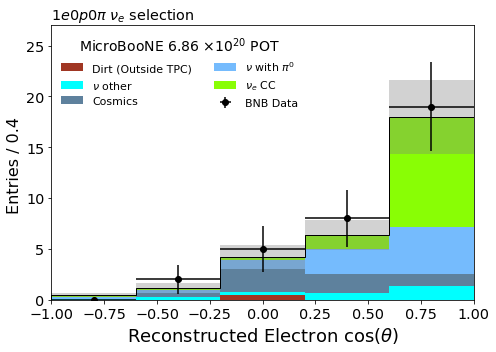

In [20]:
VARIABLE, BINS, RANGE, XTIT = 'cos_shr_theta',5,(-1,1),r"Reconstructed Electron $\cos\left(\theta\right)$"

fig, ax1, ax2 = plotter_runbyrun[run].plot_variable(
    VARIABLE,   
    query=QUERY + ' and reco_e > 0.01 and reco_e < 2.39',
    figtitle="MicroBooNE",
    #labeldecimals=0,
    predictedevents=False,
    kind="paper_category",
    draw_sys=True,
    detsysdict=DETSYS,
    DETSYSPATH=DETSYSPATH,
    COVMATRIX="",
    ratio=False,
    stacksort=3,
    title=XTIT,
    bins=BINS,
    range=RANGE,
    chisq=False,
)[0:3]

TITLE = r'1$e$0$p$0$\pi$ $\nu_e$ selection'
ax1.set_title(TITLE, loc='left')
ax1.set_ylim(0., ax1.get_ylim()[1]*1.1)

plt.tight_layout()
fig.show() 
save_path = ls.plots_path
fig.savefig('/Users/davidc-local/Neutrinos/NUE/PRD/'+SELQUERY+VARIABLE+"_PRD.pdf") 

mc : frac. detsys matrix is : 
 [0.2 0.2 0.2 0.2 0.2]
nue : frac. detsys matrix is : 
 [0.148 0.259 0.373 0.106 0.042]
dirt : frac. detsys matrix is : 
 [0.2 0.2 0.2 0.2 0.2]
ncpi0 : frac. detsys matrix is : 
 [0.2 0.2 0.2 0.2 0.2]
ccpi0 : frac. detsys matrix is : 
 [0.2 0.2 0.2 0.2 0.2]
nccpi : frac. detsys matrix is : 
 [0.2 0.2 0.2 0.2 0.2]
ncnopi : frac. detsys matrix is : 
 [0.2 0.2 0.2 0.2 0.2]


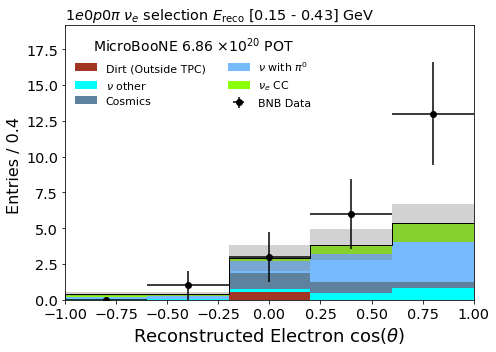

In [36]:
VARIABLE, BINS, RANGE, XTIT = 'cos_shr_theta',5,(-1,1),r"Reconstructed Electron $\cos\left(\theta\right)$"

fig, ax1, ax2 = plotter_runbyrun[run].plot_variable(
    VARIABLE,   
    query=QUERY + ' and reco_e > 0.15 and reco_e < 0.43',
    figtitle="MicroBooNE",
    #labeldecimals=0,
    legendloc=2,
    predictedevents=False,
    kind="paper_category",
    draw_sys=True,
    detsysdict=DETSYS,
    DETSYSPATH=DETSYSPATH,
    COVMATRIX="",
    ratio=False,
    stacksort=3,
    title=XTIT,
    bins=BINS,
    range=RANGE,
    chisq=False,
)[0:3]

TITLE = r'1$e$0$p$0$\pi$ $\nu_e$ selection $E_{\rm reco}$ [0.15 - 0.43] GeV'
ax1.set_title(TITLE, loc='left')
ax1.set_ylim(0., ax1.get_ylim()[1]*1.1)

plt.tight_layout()
fig.show() 
save_path = ls.plots_path
fig.savefig('/Users/davidc-local/Neutrinos/NUE/PRD/'+SELQUERY+VARIABLE+"_PRD_LowE.pdf") 

# Loose Selection

In [31]:
from unblinding_far_sideband import *

sdb_key = 'None'
pre_key = 'ZP'
sel_key = 'ZPLOOSESEL'
run = 123

sideband = sideband_categories[sdb_key]
preselection = preselection_categories[pre_key]
sel =  selection_categories[sel_key]

DETSYS = {'mc':True,'nue':True,'ccpi0':True,'ncpi0':True,'dirt':True,\
          'ncnopi':True,'nccpi':True,'ncpi0':True,'ccpi0':True}

DETSYSPATH = ls.ntuple_path+'/detsys/{}_{}_{}/'.format(sideband['dir'], preselection['dir'], sel['dir'])

QUERY = ""
for query in [sideband['query'],preselection['query'],sel['query']]:
    if query is None: continue
    if QUERY: QUERY += ' and '
    QUERY += query
    if run in [1, 2, 3, 12]:
        QUERY += f' and run{run}==True'
        
SELQUERY = '{}_{}_{}_'.format(sideband['dir'], preselection['dir'], sel['dir'])
        
TITLE = ""
for text in [f'Run {run}',' - ',sideband['title'],' - ',preselection['title'],'\n',sel['title'],' - ',pi0scaling["title"]]:
    if text is None: continue
    TITLE += text

mc : frac. detsys matrix is : 
 [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
nue : frac. detsys matrix is : 
 [0.645 0.243 0.199 0.215 0.065 0.161 0.117 0.068 0.093 0.054]
dirt : frac. detsys matrix is : 
 [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
ncpi0 : frac. detsys matrix is : 
 [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
ccpi0 : frac. detsys matrix is : 
 [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
nccpi : frac. detsys matrix is : 
 [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
ncnopi : frac. detsys matrix is : 
 [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]


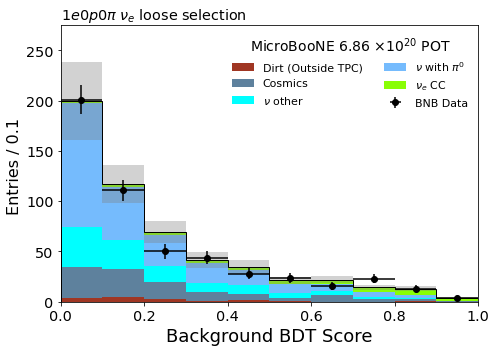

In [32]:
VARIABLE, BINS, RANGE, XTIT = 'bkg_score',10,(0,1),r"Background BDT Score"

fig, ax1, ax2 = plotter_runbyrun[run].plot_variable(
    VARIABLE,   
    query=QUERY + ' and reco_e > 0.15 and reco_e < 2.39',
    figtitle="MicroBooNE",
    #labeldecimals=0,
    predictedevents=False,
    kind="paper_category",
    draw_sys=True,
    detsysdict=DETSYS,
    DETSYSPATH=DETSYSPATH,
    COVMATRIX="",
    ratio=False,
    stacksort=3,
    title=XTIT,
    bins=BINS,
    range=RANGE,
    chisq=False,
)[0:3]

TITLE = r'1$e$0$p$0$\pi$ $\nu_e$ loose selection'
ax1.set_title(TITLE, loc='left')
ax1.set_ylim(0., ax1.get_ylim()[1]*1.1)

plt.tight_layout()
fig.show() 
save_path = ls.plots_path
fig.savefig('/Users/davidc-local/Neutrinos/NUE/PRD/'+SELQUERY+VARIABLE+"_PRD.pdf") 

# Loose Selection in 2-Dhower Sideband

In [37]:
from unblinding_far_sideband import *

sdb_key = 'None'
pre_key = 'ZPTwoShr'
sel_key = 'ZPLOOSETWOSHR'
run = 123

sideband = sideband_categories[sdb_key]
preselection = preselection_categories[pre_key]
sel =  selection_categories[sel_key]

DETSYS = {'mc':True,'nue':True,'ccpi0':True,'ncpi0':True,'dirt':True,\
          'ncnopi':True,'nccpi':True,'ncpi0':True,'ccpi0':True}

DETSYSPATH = ls.ntuple_path+'/detsys/{}_{}_{}/'.format(sideband['dir'], preselection['dir'], sel['dir'])

QUERY = ""
for query in [sideband['query'],preselection['query'],sel['query']]:
    if query is None: continue
    if QUERY: QUERY += ' and '
    QUERY += query
    if run in [1, 2, 3, 12]:
        QUERY += f' and run{run}==True'
        
SELQUERY = '{}_{}_{}_'.format(sideband['dir'], preselection['dir'], sel['dir'])
        
TITLE = ""
for text in [f'Run {run}',' - ',sideband['title'],' - ',preselection['title'],'\n',sel['title'],' - ',pi0scaling["title"]]:
    if text is None: continue
    TITLE += text

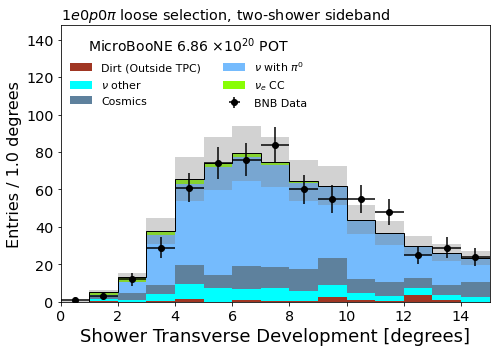

In [43]:
VARIABLE, BINS, RANGE, XTIT = 'shrmoliereavg',15,(0,15),"Shower Transverse Development [degrees]"

DETSYS = {'mc':False,'nue':False,'ccpi0':False,'ncpi0':False,'dirt':False,\
          'ncnopi':False,'nccpi':False,'ncpi0':False,'ccpi0':False}

fig, ax1, ax2 = plotter_runbyrun[run].plot_variable(
    VARIABLE,   
    query=QUERY,
    figtitle="MicroBooNE",
    #labeldecimals=0,
    legendloc=2,
    predictedevents=False,
    kind="paper_category",
    draw_sys=True,
    detsysdict=DETSYS,
    DETSYSPATH=DETSYSPATH,
    COVMATRIX="",
    ratio=False,
    stacksort=3,
    title=XTIT,
    bins=BINS,
    range=RANGE,
    chisq=False,
)[0:3]

TITLE = r'1$e$0$p$0$\pi$ loose selection, two-shower sideband'
ax1.set_title(TITLE, loc='left')
ax1.set_ylim(0., ax1.get_ylim()[1]*1.5)

plt.tight_layout()
fig.show() 
save_path = ls.plots_path
fig.savefig('/Users/davidc-local/Neutrinos/NUE/PRD/'+SELQUERY+VARIABLE+"_PRD.pdf") 